In [ ]:
import json

In [12]:
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

In [1]:
coauthorship_file_names = ["citation_graphs/aps_citations_%d.csv" % (1893+x) for x in range(2013-1893+1)]
edges = {}
vertices = {}

In [ ]:
vertices_count_list = []
edges_count_list = []
for file_name in coauthorship_file_names:
    print file_name
    with open(file_name) as year_graph:
        first_line = True
        vertices_count = 0
        edges_count = 0
        for line in year_graph:
            if not first_line:
                v1, v2, w = line.strip().split(",")
                if v1 not in vertices:
                    vertices[v1] = True
                    vertices_count += 1
                if v2 not in vertices:
                    vertices[v2] = True
                    vertices_count += 1
                edge = (v1, v2)
                if edge not in edges:
                    edges_count += 1
                edges[edge] = True
            first_line = False
        vertices_count_list.append(vertices_count)
        edges_count_list.append(edges_count)

citation_graphs/aps_citations_1893.csv
citation_graphs/aps_citations_1894.csv
citation_graphs/aps_citations_1895.csv
citation_graphs/aps_citations_1896.csv
citation_graphs/aps_citations_1897.csv
citation_graphs/aps_citations_1898.csv
citation_graphs/aps_citations_1899.csv
citation_graphs/aps_citations_1900.csv
citation_graphs/aps_citations_1901.csv
citation_graphs/aps_citations_1902.csv
citation_graphs/aps_citations_1903.csv
citation_graphs/aps_citations_1904.csv
citation_graphs/aps_citations_1905.csv
citation_graphs/aps_citations_1906.csv
citation_graphs/aps_citations_1907.csv
citation_graphs/aps_citations_1908.csv
citation_graphs/aps_citations_1909.csv
citation_graphs/aps_citations_1910.csv
citation_graphs/aps_citations_1911.csv
citation_graphs/aps_citations_1912.csv
citation_graphs/aps_citations_1913.csv
citation_graphs/aps_citations_1914.csv
citation_graphs/aps_citations_1915.csv
citation_graphs/aps_citations_1916.csv
citation_graphs/aps_citations_1917.csv
citation_graphs/aps_citat

In [ ]:
with open("cc_edges_count_list.json", "w") as edges_file:
    json.dump(edges_count_list, edges_file)
    
with open("cc_vertices_count_list.json", "w") as edges_file:
    json.dump(vertices_count_list, edges_file)

In [ ]:
years = [1893+x for x in range(2013-1893+1)]

In [ ]:
for x in xrange(len(vertices_count_list)-1):
    vertices_count_list[x+1] = vertices_count_list[x+1]+vertices_count_list[x]
    
for x in xrange(len(edges_count_list)-1):
    edges_count_list[x+1] = edges_count_list[x+1]+edges_count_list[x]

In [ ]:
average_degree = []
for x in xrange(len(vertices_count_list)):
    try:
        average_degree.append((2.*edges_count_list[x])/vertices_count_list[x])
    except ZeroDivisionError:
        try:
            average_degree.append(average_degree[-1])
        except:
            average_degree.append(0)

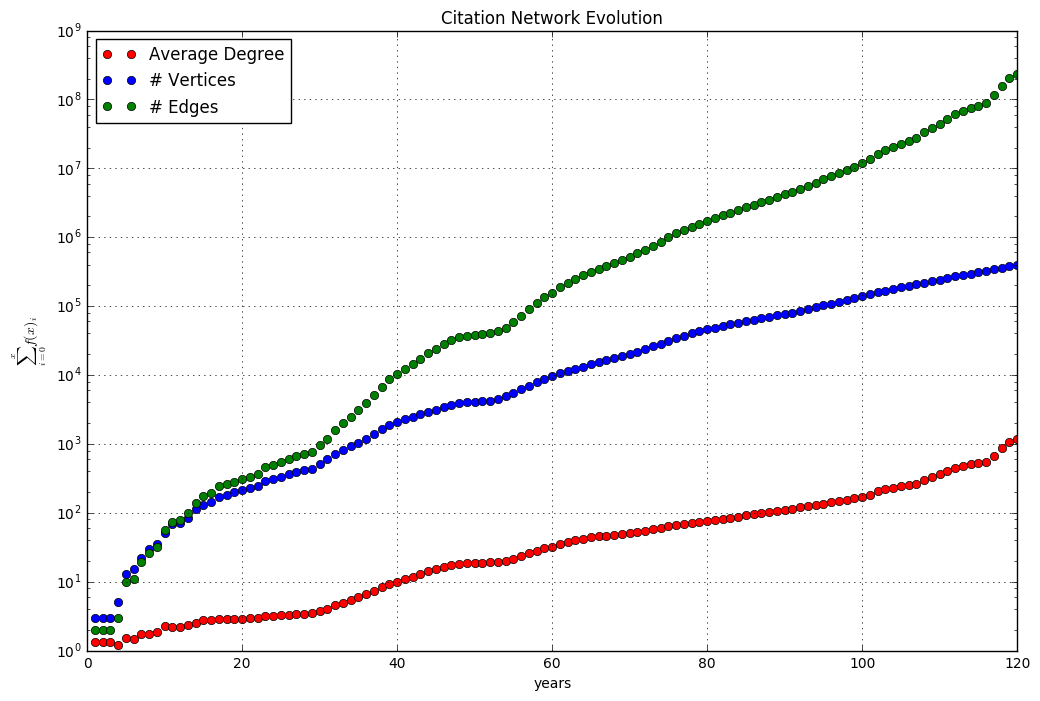

In [21]:
plt.figure(figsize=(12,8))
plt.plot(average_degree,'ro') # plotting t,a separately 
plt.plot(vertices_count_list,'bo') # plotting t,b separately 
plt.plot(edges_count_list,'go') # plotting t,c separately 
plt.yscale("log")
plt.legend(["Average Degree", "# Vertices", "# Edges"], loc='upper left')
plt.title("Citation Network Evolution")
plt.xlabel("years")
plt.ylabel(r'$\sum_{i=0}^x f(x)_i$')
#plt.xlim([1893, 2013])
plt.grid(True)
plt.savefig("citation_network_evolution.png")
plt.savefig("citation_network_evolution.eps")
plt.show()